In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("housing[1].csv")

In [4]:
data.dropna(inplace=True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [8]:
train_data=X_train.join(Y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17256,-119.70,34.42,43.0,1802.0,557.0,1490.0,538.0,2.6750,<1H OCEAN,247900.0
5952,-117.85,34.12,30.0,4367.0,1033.0,2524.0,954.0,3.0448,INLAND,192100.0
1403,-122.08,37.95,33.0,1043.0,157.0,425.0,148.0,4.8702,NEAR BAY,235600.0
18644,-121.98,36.97,21.0,3349.0,737.0,1952.0,718.0,3.7273,NEAR OCEAN,251900.0
8338,-118.31,33.93,42.0,1173.0,201.0,602.0,186.0,5.5787,<1H OCEAN,142000.0
...,...,...,...,...,...,...,...,...,...,...
14507,-117.21,32.89,14.0,3114.0,773.0,1592.0,776.0,3.3176,NEAR OCEAN,156100.0
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,INLAND,164100.0
17921,-121.99,37.35,25.0,1527.0,325.0,707.0,339.0,4.3750,<1H OCEAN,212200.0
1386,-122.08,37.97,9.0,2643.0,439.0,1105.0,467.0,6.6579,NEAR BAY,245200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

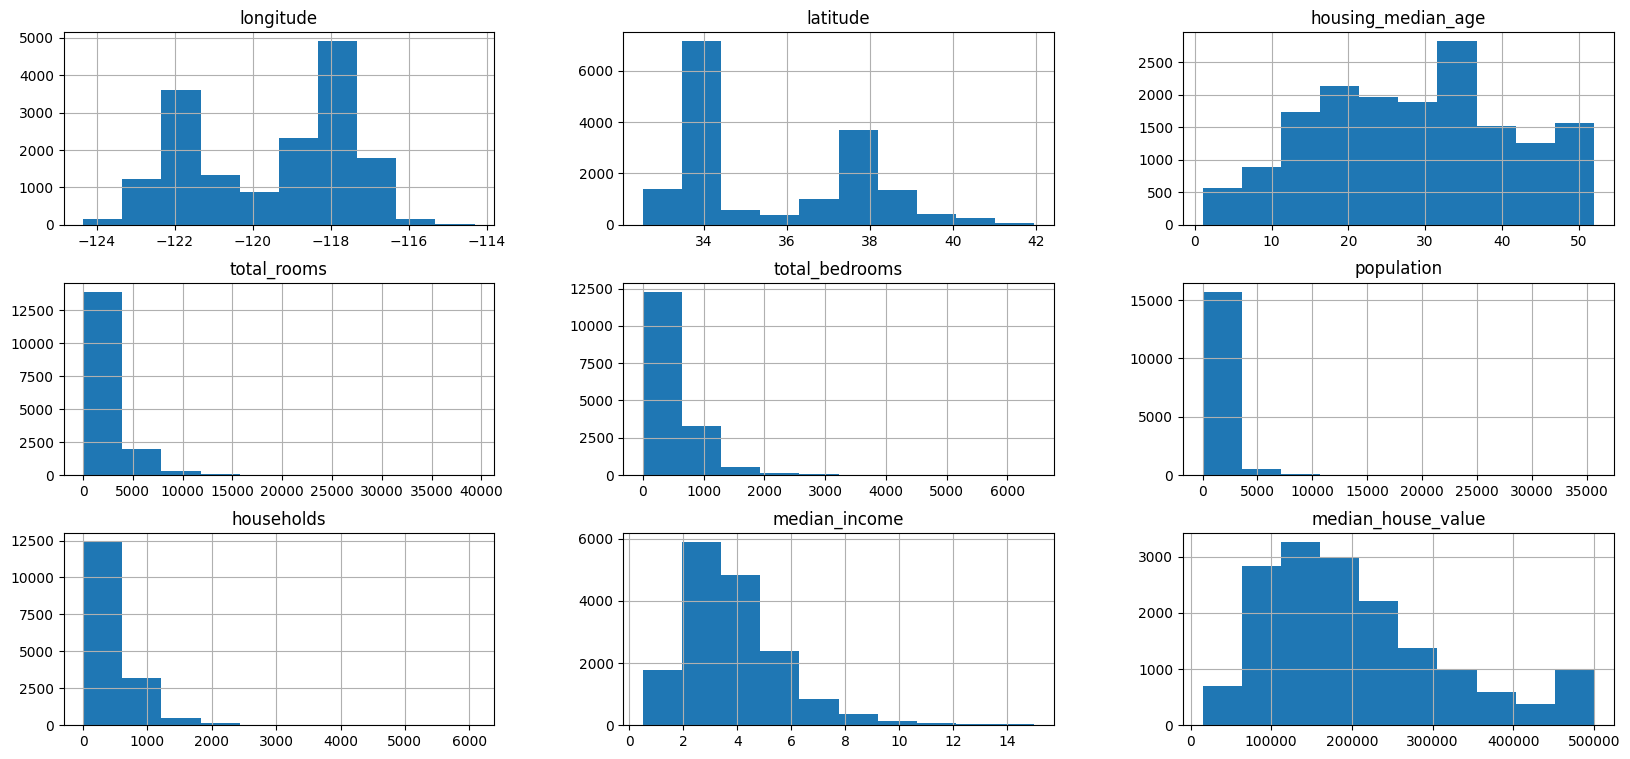

In [9]:
train_data.hist(figsize=(20,9))

In [10]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

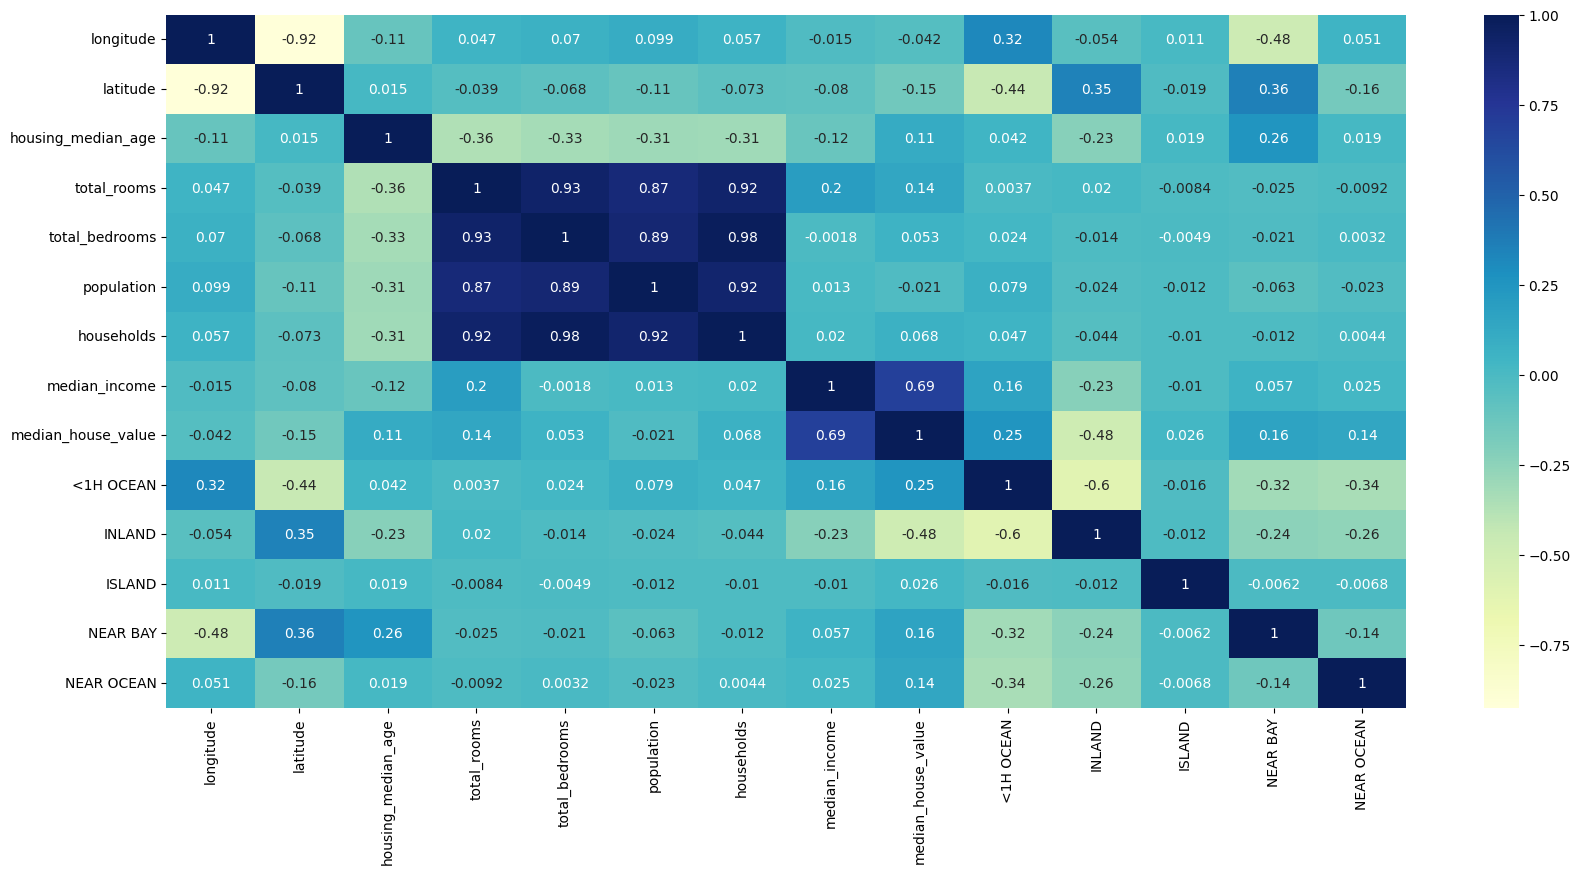

In [32]:
plt.figure(figsize=(20,9))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

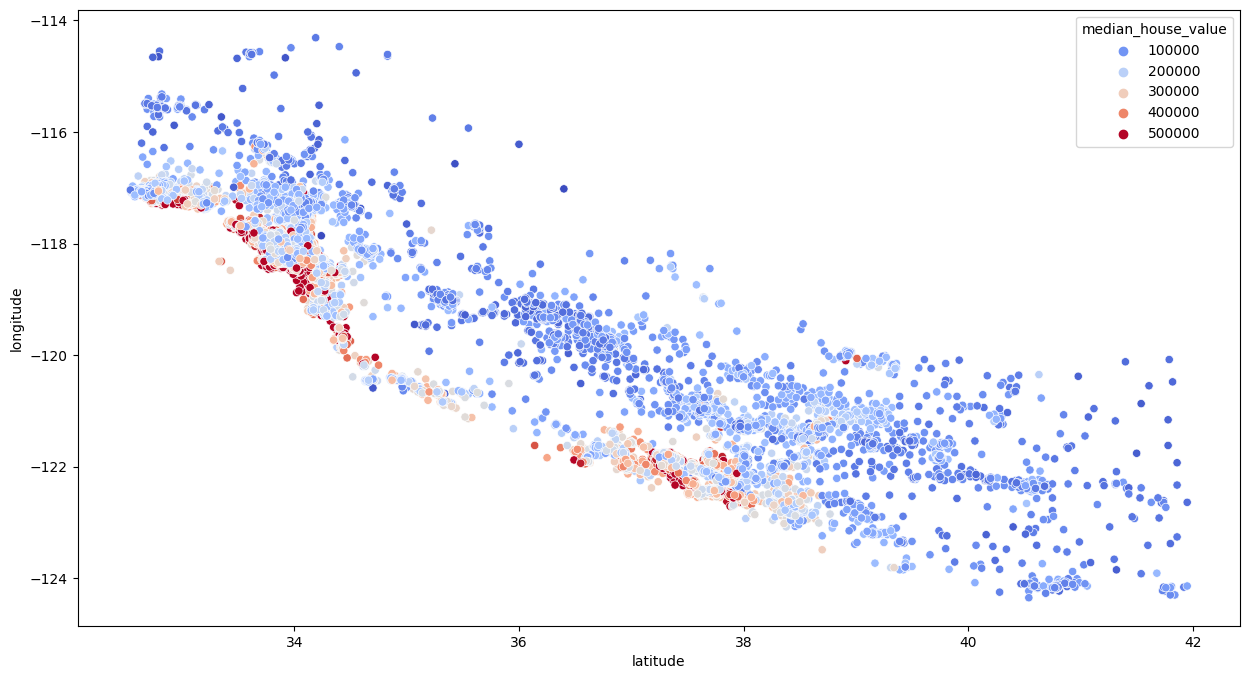

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue="median_house_value",palette="coolwarm")

In [15]:
X_train,Y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [28]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/train_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/train_data['households']

X_test,Y_test=train_data.drop(["median_house_value"],axis=1),train_data["median_house_value"]

In [29]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3058,-119.69,35.62,18.0,6.710523,5.480639,7.204893,5.337538,2.1186,47500.0,False,True,False,False,NaN,NaN
2000,-119.78,36.74,15.0,7.287561,6.030685,6.829794,5.877736,2.5045,90300.0,False,True,False,False,NaN,NaN
10064,-121.03,39.37,15.0,7.198931,5.789960,7.067320,5.726848,2.6341,85000.0,False,True,False,False,NaN,NaN
6769,-118.15,34.10,52.0,8.372399,6.714171,7.564238,6.679599,3.9485,419100.0,True,False,False,False,NaN,NaN
983,-121.86,37.66,22.0,8.198364,6.499787,7.438384,6.463029,4.1597,293200.0,False,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,-118.23,34.22,37.0,7.227662,5.472271,6.428105,5.424950,5.9771,431800.0,True,False,False,False,NaN,NaN
17558,-121.89,37.32,34.0,6.922644,5.509388,6.859615,5.375278,2.8864,172500.0,True,False,False,False,NaN,NaN
4420,-118.26,34.07,46.0,7.758761,6.556778,7.771489,6.475433,2.4038,181700.0,True,False,False,False,NaN,NaN
13000,-121.26,38.67,18.0,7.512618,5.749393,6.809039,5.891644,4.2273,141800.0,False,True,False,False,NaN,NaN


In [30]:
reg.score(X_test,Y_test)

0.6486324180657717